In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')
DATA_PATH = '/content/gdrive/My Drive/mane/'

Mounted at /content/gdrive


# Preprocessing

In [15]:
df1 = pd.read_csv('/content/gdrive/My Drive/Mane/customer_data.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/Mane/sales_details.csv')
df3 = pd.read_csv('/content/gdrive/My Drive/Mane/sales_summary.csv')

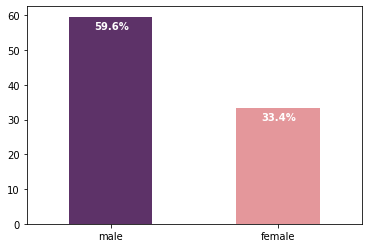

In [16]:
#Gender of the Customers
colors = ['#5D3268','#E4979B','#228B22']
ax = (df1['gender'].value_counts()*100.0 /len(df1)).plot(kind='bar',
                                                                   stacked = True,
                                                                   rot = 0,
                                                                   color = colors)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=10,
            color='white',
           weight = 'bold')

In [17]:


# fillna
# df1['gender'] = df1['gender'].fillna('male')
# df1['birth_year'] = df1['birth_year'].fillna(1989.0)
df3['total_num_of_visits'] = df3['total_num_of_visits'].fillna(0)
df3['total_amount_spent'] = df3['total_amount_spent'].fillna(0)

#pivoting
pivoted = df3.pivot_table(index="customer_id", 
                    columns=['year', 'month'], 
                    values=['total_num_of_visits', 'total_amount_spent'],
                    fill_value=0)  

In [18]:


# visits and spent amounts
visits = pivoted['total_num_of_visits']
spent = pivoted['total_amount_spent']
df_visits = visits[2017]
df_spent = spent[2017]

#Rearranging
list_f = ('total_num_of_visits', 'total_amount_spent')
list_y = (2017,2018,2019)
x=0
for i in list_y:
  for j in visits[i].columns:
    df_visits[x+j] = visits[i][j]
  x+=12
  
x=100
for i in list_y:
  for j in spent[i].columns:
    df_spent[x+j] = spent[i][j]
  x+=12

df_spent = df_spent.drop([1,2,3,4,5,6,7,8,9,10,11,12],axis='columns')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
total_num_of_visits = df_visits
total_amount_spent=df_spent

In [20]:
total_num_of_visits

month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000,0,3,0,0,0,1,0,2,1,1,1,4,1,4,3,2,3,2,7,7,3,2,2,4,1,4,3,3,5,2,5,6,2,5
100001,6,3,11,20,16,11,9,16,12,18,12,20,18,2,12,7,10,10,15,14,6,6,13,6,11,6,5,6,5,6,5,6,7,5
100002,3,3,3,3,11,8,9,5,7,10,4,2,7,3,2,4,4,3,1,2,4,3,7,4,2,1,1,2,5,6,5,0,5,9
100003,7,6,6,7,5,6,6,6,3,3,2,3,2,5,7,8,10,12,7,9,8,13,11,10,11,12,11,8,10,8,7,9,7,7
100004,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,4,0,0,0,0,2,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
109996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
109997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,1,0,2,1,3,1,2,1


In [21]:
total_amount_spent

month,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000,0.00,7895.58,0.00,0.00,0.00,1960.75,0.00,6243.27,4082.50,1654.00,4598.50,3724.71,1548.25,10651.45,6072.25,7035.25,10173.41,4051.00,11046.31,13757.62,6524.50,5602.39,3218.98,9095.98,2462.14,9062.05,5518.48,7666.06,11725.00,3289.29,10144.00,10788.04,3503.50,13451.40
100001,8731.09,6155.50,22786.69,39048.09,20550.04,8436.45,24188.53,24099.49,24357.36,39255.16,14792.43,29399.16,27913.78,1363.00,16887.70,12472.09,14786.88,21662.29,35957.07,23421.52,5318.91,10663.00,10330.95,11453.76,22446.49,24626.89,7176.28,5927.34,24055.84,19162.17,6664.32,13654.42,8590.99,11502.36
100002,1483.00,2824.00,6085.23,761.67,9405.04,14253.52,11077.32,2675.47,5172.76,7064.42,5237.16,4355.34,5843.55,2196.18,4216.21,3367.63,4748.38,2308.75,3389.27,2658.97,7234.30,5687.20,8535.37,4636.57,3835.42,3589.00,382.30,5155.00,5623.27,8326.42,8016.45,0.00,2705.61,12921.95
100003,13716.61,12095.13,6091.39,15400.62,9869.29,13098.54,10617.06,12020.26,7887.82,8599.78,6083.58,6897.15,4508.89,17712.09,12607.99,8969.85,19764.06,23664.22,18633.85,18280.61,15240.04,21473.71,20823.86,15442.53,20802.93,24796.17,21909.18,12711.84,19601.31,19854.30,20510.38,18375.48,12358.57,13348.62
100004,0.00,0.00,7946.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5469.16,0.00,0.00,0.00,8516.50,0.00,0.00,11993.29,0.00,0.00,0.00,0.00,14144.06,10079.44,0.00,6458.18,0.00,797.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1621.01,760.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
109996,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8027.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
109997,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4798.57,9127.15,6722.62,782.50,0.00,2766.15,1081.48,1604.50,2559.97,4007.17,2231.14


In [22]:
pivoted

total_amount_spent                                ... total_num_of_visits         
year                      2017                                ...                2019         
month                       1         2         3         4   ...                  7  8  9  10
customer_id                                                   ...                             
100000                    0.00   7895.58      0.00      0.00  ...                   5  6  2  5
100001                 8731.09   6155.50  22786.69  39048.09  ...                   5  6  7  5
100002                 1483.00   2824.00   6085.23    761.67  ...                   5  0  5  9
100003                13716.61  12095.13   6091.39  15400.62  ...                   7  9  7  7
100004                    0.00      0.00   7946.79      0.00  ...                   1  0  1  0
...                        ...       ...       ...       ...  ...                 ... .. .. ..
109995                    0.00      0.00      0.00      0.00  ...                   0  0  0  0
109996                    0.00      0.00      0.00      0.00  ...                   0  0  0  0
109997                    0.00      0.00      0.00      0.00  ...                   3  1  2  1
109998                    0.00      0.00      0.00      0.00  ...                   1  0  1  0
109999                    0.00      0.00      0.00      0.00  ...                   4  1  0  5

[9804 rows x 68 columns]

In [33]:
result = pd.merge(df1, df_visits, how='left', on=['customer_id'])
result= pd.merge(result,df_spent, how='left', on=['customer_id'])
result['sum'] = result[17]+result[18]
result.loc[result['sum']==0.0,'label'] = 0
result['label'].fillna(1, inplace=True)
result['label']= pd.to_numeric(result['label'], downcast='integer')
result['age']= 2019 - result['birth_year']
result["gender"] = result["gender"].map({"female": 0, "male":1})
result["label"] = result["label"].map({1: 'visit', 0:"no visit"})
#result = pd.concat([result,pd.get_dummies(result['gender'], prefix='gender')],axis=1)
result = result.drop(['sum','birth_year'],axis='columns')
result = result.fillna(0.0)
result


,customer_id,gender,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,label,age
0,100000,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,4.0,1.0,4.0,3.0,2.0,3.0,2.0,7.0,7.0,3.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,5.0,2.0,5.0,6.0,2.0,5.0,0.00,7895.58,0.00,0.00,0.00,1960.75,0.00,6243.27,4082.50,1654.00,4598.50,3724.71,1548.25,10651.45,6072.25,7035.25,10173.41,4051.00,11046.31,13757.62,6524.50,5602.39,3218.98,9095.98,2462.14,9062.05,5518.48,7666.06,11725.00,3289.29,10144.00,10788.04,3503.50,13451.40,visit,39.0
1,100001,0.0,6.0,3.0,11.0,20.0,16.0,11.0,9.0,16.0,12.0,18.0,12.0,20.0,18.0,2.0,12.0,7.0,10.0,10.0,15.0,14.0,6.0,6.0,13.0,6.0,11.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,7.0,5.0,8731.09,6155.50,22786.69,39048.09,20550.04,8436.45,24188.53,24099.49,24357.36,39255.16,14792.43,29399.16,27913.78,1363.00,16887.70,12472.09,14786.88,21662.29,35957.07,23421.52,5318.91,10663.00,10330.95,11453.76,22446.49,24626.89,7176.28,5927.34,24055.84,19162.17,6664.32,13654.42,8590.99,11502.36,visit,50.0
2,100002,1.0,3.0,3.0,3.0,3.0,11.0,8.0,9.0,5.0,7.0,10.0,4.0,2.0,7.0,3.0,2.0,4.0,4.0,3.0,1.0,2.0,4.0,3.0,7.0,4.0,2.0,1.0,1.0,2.0,5.0,6.0,5.0,0.0,5.0,9.0,1483.00,2824.00,6085.23,761.67,9405.04,14253.52,11077.32,2675.47,5172.76,7064.42,5237.16,4355.34,5843.55,2196.18,4216.21,3367.63,4748.38,2308.75,3389.27,2658.97,7234.30,5687.20,8535.37,4636.57,3835.42,3589.00,382.30,5155.00,5623.27,8326.42,8016.45,0.00,2705.61,12921.95,visit,41.0
3,100003,1.0,7.0,6.0,6.0,7.0,5.0,6.0,6.0,6.0,3.0,3.0,2.0,3.0,2.0,5.0,7.0,8.0,10.0,12.0,7.0,9.0,8.0,13.0,11.0,10.0,11.0,12.0,11.0,8.0,10.0,8.0,7.0,9.0,7.0,7.0,13716.61,12095.13,6091.39,15400.62,9869.29,13098.54,10617.06,12020.26,7887.82,8599.78,6083.58,6897.15,4508.89,17712.09,12607.99,8969.85,19764.06,23664.22,18633.85,18280.61,15240.04,21473.71,20823.86,15442.53,20802.93,24796.17,21909.18,12711.84,19601.31,19854.30,20510.38,18375.48,12358.57,13348.62,visit,54.0
4,100004,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.00,0.00,7946.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5469.16,0.00,0.00,0.00,8516.50,0.00,0.00,11993.29,0.00,0.00,0.00,0.00,14144.06,10079.44,0.00,6458.18,0.00,797.50,0.00,no visit,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1621.01,760.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,no visit,26.0
9996,109996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8027.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,no visit,31.0
9997,109997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4798.57,9127.15,6722.62,782.50,0.00,2766.15,1081.48,1604.50,2559.97,4007.17,2231.14,no visit,28.0
9998,109998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [24]:
result['label'].value_counts()

visit       5001
no visit    4999
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


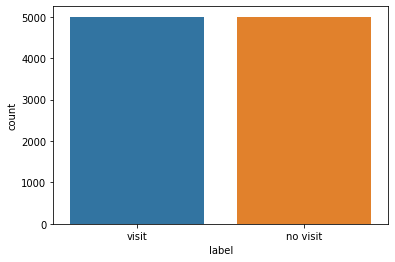

In [25]:
import seaborn as sns
#Visualization of the Churn of the Store
sns.countplot(result['label'])

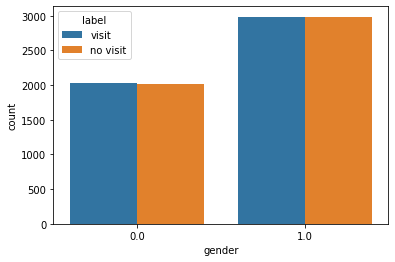

In [26]:
#Churn With respect to Gender
sns.countplot(x = 'gender', hue = 'label', data = result)


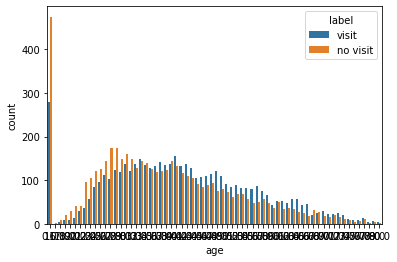

In [27]:
sns.countplot(x = 'age', hue = 'label', data = result)

# Training set

In [38]:
# train = result[['customer_id','birth_year','gender_female','gender_male',10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,'label']]
# train = result[['customer_id','birth_year','gender_female','gender_male',16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,'label']]
# train = result[['customer_id','birth_year','gender_female','gender_male',12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,'label']]
result["label"] = result["label"].map({'visit':1,"no visit":0})
train = result[['customer_id','age','gender',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,'label']]
train

,customer_id,age,gender,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,label
0,100000,39.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,4.0,1.0,4.0,3.0,2.0,0.00,7895.58,0.00,0.00,0.00,1960.75,0.00,6243.27,4082.50,1654.00,4598.50,3724.71,1548.25,10651.45,6072.25,7035.25,1
1,100001,50.0,0.0,6.0,3.0,11.0,20.0,16.0,11.0,9.0,16.0,12.0,18.0,12.0,20.0,18.0,2.0,12.0,7.0,8731.09,6155.50,22786.69,39048.09,20550.04,8436.45,24188.53,24099.49,24357.36,39255.16,14792.43,29399.16,27913.78,1363.00,16887.70,12472.09,1
2,100002,41.0,1.0,3.0,3.0,3.0,3.0,11.0,8.0,9.0,5.0,7.0,10.0,4.0,2.0,7.0,3.0,2.0,4.0,1483.00,2824.00,6085.23,761.67,9405.04,14253.52,11077.32,2675.47,5172.76,7064.42,5237.16,4355.34,5843.55,2196.18,4216.21,3367.63,1
3,100003,54.0,1.0,7.0,6.0,6.0,7.0,5.0,6.0,6.0,6.0,3.0,3.0,2.0,3.0,2.0,5.0,7.0,8.0,13716.61,12095.13,6091.39,15400.62,9869.29,13098.54,10617.06,12020.26,7887.82,8599.78,6083.58,6897.15,4508.89,17712.09,12607.99,8969.85,1
4,100004,60.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,7946.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5469.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109995,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
9996,109996,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
9997,109997,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
9998,109998,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


# model training

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn import naive_bayes
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold,  KFold, train_test_split


In [40]:
X = train.drop(['label'],axis='columns')
Y = train['label']
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
kfold = StratifiedKFold(n_splits=10)
random_state = 2

classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state = 2))
classifiers.append(XGBClassifier(random_state=2, max_depth=4,n_estimators=300,gamma=0.3,learning_rate=0.2,max_delta_step=1))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(naive_bayes.BernoulliNB())
classifiers.append(naive_bayes.GaussianNB())
classifiers.append(MLPClassifier(hidden_layer_sizes=(50,100,50), max_iter=1000))

c_results = []
c_roc=[]
for classifier in classifiers : 
    c_results.append(cross_val_score(classifier, X, y = Y, scoring = 'f1', cv = kfold, n_jobs=4)) 
   
    
c_means = []
c_std = []
for c_result in c_results:
    c_means.append(c_result.mean())
    c_std.append(c_result.std())
    
c_res = pd.DataFrame({"CrossValMeans":c_means,"CrossValerrors": c_std,"Algorithm":["DecisionTree","RandomForest","xgcBoot","KNN","Log_Reg","naive_ber","naive_gass","MLPC"]}) 
c_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.701617,0.046998,DecisionTree
1,0.768025,0.041139,RandomForest
2,0.759794,0.040428,xgcBoot
3,0.737258,0.020961,KNN
4,0.778093,0.016259,Log_Reg
5,0.728611,0.014858,naive_ber
6,0.659551,0.020310,naive_gass
7,0.754637,0.016907,MLPC


f1:  0.8116537825640109


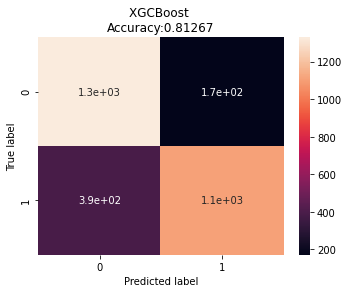

In [42]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state=123) # 70% training and 30% test

#Train the model using the training sets y_pred=clf.predict(X_test)
model=XGBClassifier(random_state=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns

# Creates a confusion matrix
cm2 = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df2 = pd.DataFrame(cm2)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df2, annot=True)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print('f1: ', f1)
accuracy = accuracy_score(y_test, y_pred)
plt.title('XGCBoost \nAccuracy:{0:.5f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Part 01 - Validation

In [43]:
test = result[['customer_id','age','gender',19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134]]
x=1
for i in range(19, 35, 1):
  test[x] = test[i]
  test = test.drop([i],axis='columns')
  x+=1

x=101
for i in range(119, 135, 1):
  test[x] = test[i]
  test = test.drop([i],axis='columns')
  x+=1
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,customer_id,age,gender,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
0,100000,39.0,0.0,7.0,7.0,3.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,5.0,2.0,5.0,6.0,2.0,5.0,11046.31,13757.62,6524.50,5602.39,3218.98,9095.98,2462.14,9062.05,5518.48,7666.06,11725.00,3289.29,10144.00,10788.04,3503.50,13451.40
1,100001,50.0,0.0,15.0,14.0,6.0,6.0,13.0,6.0,11.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,7.0,5.0,35957.07,23421.52,5318.91,10663.00,10330.95,11453.76,22446.49,24626.89,7176.28,5927.34,24055.84,19162.17,6664.32,13654.42,8590.99,11502.36
2,100002,41.0,1.0,1.0,2.0,4.0,3.0,7.0,4.0,2.0,1.0,1.0,2.0,5.0,6.0,5.0,0.0,5.0,9.0,3389.27,2658.97,7234.30,5687.20,8535.37,4636.57,3835.42,3589.00,382.30,5155.00,5623.27,8326.42,8016.45,0.00,2705.61,12921.95
3,100003,54.0,1.0,7.0,9.0,8.0,13.0,11.0,10.0,11.0,12.0,11.0,8.0,10.0,8.0,7.0,9.0,7.0,7.0,18633.85,18280.61,15240.04,21473.71,20823.86,15442.53,20802.93,24796.17,21909.18,12711.84,19601.31,19854.30,20510.38,18375.48,12358.57,13348.62
4,100004,60.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.00,8516.50,0.00,0.00,11993.29,0.00,0.00,0.00,0.00,14144.06,10079.44,0.00,6458.18,0.00,797.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109995,26.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1621.01,760.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9996,109996,31.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,8027.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9997,109997,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,1.0,0.00,0.00,0.00,0.00,0.00,4798.57,9127.15,6722.62,782.50,0.00,2766.15,1081.48,1604.50,2559.97,4007.17,2231.14
9998,109998,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1045.00,2545.00,3437.50,0.00,970.00,0.00,14607.19,0.00


In [44]:
val = test[5000:]
val

,customer_id,age,gender,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
5000,105000,61.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,2.0,4.0,0.0,0.0,5.0,7.0,7.0,0.0,3.0,1.0,1086.37,2193.76,981.76,7252.99,5211.13,1728.10,1446.46,3988.09,0.0,0.00,4707.00,8882.11,8005.03,0.00,2727.82,828.10
5001,105001,42.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,0.0,2.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,1429.36,640.00,653.50,4310.02,2581.83,6933.22,0.00,3805.78,712.0,5361.79,1748.74,1438.12,0.00,0.00,0.00,5790.31
5002,105002,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5266.87,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5003,105003,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,5.0,2.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1532.5,0.00,1007.50,0.00,0.00,460.00,2588.50,906.88
5004,105004,67.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,400.02,1819.98,0.00,1886.44,493.00,0.00,0.00,0.00,0.0,9426.70,531.10,5739.75,1758.76,4112.95,714.31,611.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109995,26.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1621.01,760.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9996,109996,31.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,8027.41,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9997,109997,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,1.0,0.00,0.00,0.00,0.00,0.00,4798.57,9127.15,6722.62,782.5,0.00,2766.15,1081.48,1604.50,2559.97,4007.17,2231.14
9998,109998,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1045.0,2545.00,3437.50,0.00,970.00,0.00,14607.19,0.00


In [45]:
val = scaler.transform(val)
pred = model.predict(val)
print(pred)


[1 1 0 ... 1 0 1]


In [46]:
a_str = ','.join(str(x) for x in pred)
print(a_str)
x = a_str.split(",")
print(x)

1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1,0,

In [47]:
with open('/content/gdrive/My Drive/Mane/ResultTest.txt', 'w') as f: 
  for item in x:
    f.write("%s\n" % item)
!cat /content/gdrive/My\ Drive/Mane/ResultTest.txt

1
1
0
1
1
0
0
1
0
1
1
1
0
1
0
1
1
1
0
0
1
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
0
1
1
1
1
1
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
1
1
0
1
1
0
0
0
1
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
0
1
0
0
0
1
0
1
1
1
1
0
0
0
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
0
0
0
0
0
0
1
0
1
1
1
0
1
0
0
1
0
0
1
0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
1
0
1
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
1
1
0
0
1
1
0
1
0
1
1
1
1
1
1
0
1
0
1
0
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
0
1
0
1
1
0
0
1
0
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
1
0
0
1
1
0
0
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
0
1
1
0
1
0
0
0
1
1
0
0
0
0
1
0
0
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
0
0
1
0
0
1
1
0
1
0
1
0
0
1
1
1
1
0
0
0
1
0
1
0
1
1
0
0
1
0
0
0
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
1
0
